CAR PRICE PREDICTION

R-squared (R²) value: 0.8539


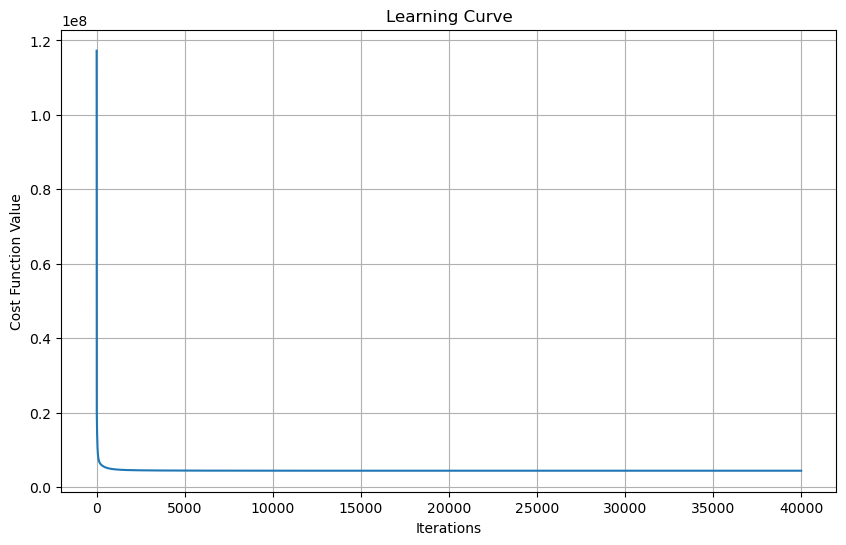

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

car_price = pd.read_csv(r"C:\Users\asus\Downloads\CarPrices\CarPrice_Assignment.csv")
data = car_price.drop(["symboling", "CarName", "carbody", "drivewheel", "enginelocation", "fuelsystem","fueltype", "aspiration", "doornumber", "enginetype", "cylindernumber"], axis=1)

# Split the data into training and testing sets
X = data.drop("price", axis=1)  # Features
y = data["price"]  # Target variable
fmin = X.min(axis=0)  # Compute the minimum for each feature
frange = X.max(axis=0) - X.min(axis=0)  # Compute the range for each feature

# Apply feature scaling
X = (X - fmin) / frange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
weights = np.random.randn(X_train.shape[1]) * 0.01

# Initialize bias to a small non-zero value
bias = 0.01

# Hyperparameters
learning_rate = 0.1
iterations = 40000
alpha = 0.1  # Regularization strength
cost_history = []

# Define the cost function with L2 regularization
def costFunction(y, predictions, weights, alpha):
    N = len(y)
    sq_error = (predictions - y) ** 2
    regularization_term = (alpha / (2 * N)) * np.sum(weights**2)
    return (1.0 / (2 * N)) * sq_error.sum() + regularization_term

# Gradient Descent
for i in range(iterations):
    predictions = np.dot(X_train, weights) + bias
    error = predictions - y_train
    N = X_train.shape[0]
    dw = (1 / N) * np.dot(X_train.T, error) + (alpha / N) * weights  # Regularization term added
    db = np.sum(error) / N
    weights -= learning_rate * dw
    bias -= learning_rate * db
    current_cost = costFunction(y_train, predictions, weights, alpha)
    cost_history.append(current_cost)

# Calculate R-squared (R²) for the test set
predictions_test = np.dot(X_test, weights) + bias
y_mean = y_test.mean()
tss = ((y_test - y_mean) ** 2).sum()
rss = ((y_test - predictions_test) ** 2).sum()
r_squared = 1 - (rss / tss)

print(f'R-squared (R²) value: {r_squared:.4f}')

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.grid(True)
plt.show()